# The Lotka-Volterra equations

The Lotka–Volterra equations are a mathematical model of predator–prey interactions between biological species. Let two variables $x$ and $y$ be proportional to the size of the populations of two species, traditionally called “rabbits” (the prey) and “foxes” (the predators). You could think of $x$ and $y$ as being the population in thousands, say, so that $x$ = 2 means there are 2000 rabbits. Strictly the only allowed values of $x$ and $y$ would then be multiples of 0.001, since you can only have whole numbers of rabbits or foxes. But 0.001 is a pretty close spacing of values, so it’s a decent approximation to treat 
$x$ and $y$ as continuous real numbers so long as neither gets very close to zero.

In the Lotka–Volterra model the rabbits reproduce at a rate proportional to their population, but are eaten by the foxes at a rate proportional to both their own population and the population of foxes:

$\frac{dx}{dt} = \alpha x - \beta xy$

where $\alpha$ and $\beta$ are constants. At the same time the foxes reproduce at a rate proportional the rate at which they eat rabbits -- because they need food to grow and reproduce -- but also die of old age at a rate proportional to their own population:

$\frac{dy}{dt} = \gamma xy - \delta y$

where $\gamma$ and $\delta$ are also constants.

In this program, I will be solving these coupled differential equations using the fourth-order Runge-Kutta method. I will take the values $\alpha$ = 1, $\beta$ = $\gamma$ = 0.5 and $\delta$ = 2 for this case, starting from the initial condition $x = y = $ 2.

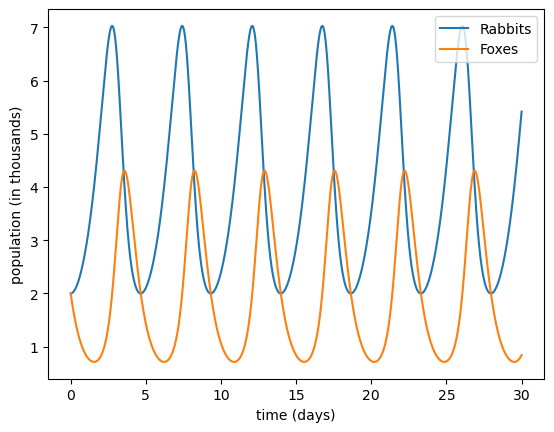

In [1]:
import math
from numpy import arange
import numpy as np
from pylab import plot,show,xlabel,ylabel,legend


# I got the idea for df as an array from
# https://stackoverflow.com/questions/29761498/lotka-volterra-equationspredator-prey-using-runge-kutta-in-python
    
def df(points,t,alpha=1,beta=0.5,gamma=0.5,delta=2):
    
    x,y = points[0],points[1]
    
    rabbits = alpha*x - beta*x*y
    foxes = gamma*x*y - delta*y
    
    return np.array([rabbits,foxes],float)
          
    
def runge_kutta(xInit,yInit,t1,t2):
    h = 0.001
       
    tpoints = arange(t1,t2,h)
    xpoints = []
    ypoints = []
    points = np.array([xInit,yInit],float)
    
    for t in tpoints:
        xpoints.append(points[0])
        ypoints.append(points[1])        
        k1 = h*df(points,t)
        k2 = h*df(points+(0.5*k1),t+(0.5*h))
        points += k2 
        
    return xpoints,ypoints,tpoints

x,y,t = runge_kutta(2,2,0,30)

plot(t,x,label = 'Rabbits')
plot(t,y, label = 'Foxes')
legend()
xlabel('time (days)')
ylabel('population (in thousands)')
show()
        

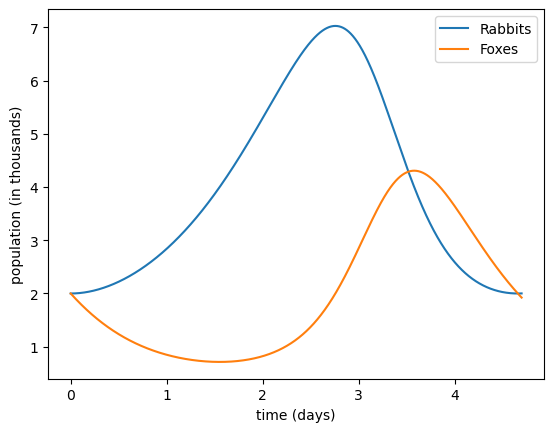

In [5]:
x1,y1,t1 = runge_kutta(2,2,0,4.7)
plot(t1,x1,label = 'Rabbits')
plot(t1,y1, label = 'Foxes')
legend()
xlabel('time (days)')
ylabel('population (in thousands)')
show()

Starting from t = 0, there are 2000 foxes and 2000 rabbits. Because each fox needs to eat more than one rabbit to survive, the fox population decreases. At the same time, rabbits reproduce fast and the population of the predator that eats them is decreasing, so the rabbit population increases very fast. 

Around t = 1.5, the population of foxes reaches turning point where it starts to increase. Now, the population increase of the rabbits starts to slow down because there are more foxes to eat them, but not enough to decrease their population overall.

Then, around t = 2.5, the population of rabbits reaches a maximum, which provides the foxes with the most rabbits they have had. The foxes eat them, and now their population finally starts to decrease.

Between t = 2.5 and t = 3.5, even though the population of the rabbits are decreasing, the foxes still have enough of a supply of them to maintain their increasing population. However, after t = 3.5, there arent enough rabbits to maintain the fox's population, so it starts to decrease.

At around t = 4.5, their populations are back at 2000 each and the cycle repeats.